# **Back Order Prediction EDA**

In [ ]:
#import libraries
import pandas as pd
import numpy as np
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plot
from matplotlib import style

In [ ]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_df=pd.read_csv("Training_Dataset_v2.csv")                           #Getting the Data
   

In [ ]:
train_df.head()              #lets have a look at the dataset

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


Column Description
sku – Random ID for the product
national_inv – Current inventory level for the part
lead_time – Transit time for product (if available)
in_transit_qty – Amount of product in transit from source
forecast_3_month – Forecast sales for the next 3 months
forecast_6_month – Forecast sales for the next 6 months
forecast_9_month – Forecast sales for the next 9 months
sales_1_month – Sales quantity for the prior 1 month time period
sales_3_month – Sales quantity for the prior 3 month time period
sales_6_month – Sales quantity for the prior 6 month time period
sales_9_month – Sales quantity for the prior 9 month time period
min_bank – Minimum recommend amount to stock
potential_issue – Source issue for part identified
pieces_past_due – Parts overdue from source
perf_6_month_avg – Source performance for prior 6 month period
perf_12_month_avg – Source performance for prior 12 month period
local_bo_qty – Amount of stock orders overdue
deck_risk – Part risk flag
oe_constraint – Part risk flag
ppap_risk – Part risk flag
stop_auto_buy – Part risk flag
rev_stop – Part risk flag
went_on_backorder – Product actually went on backorder. This is the target value.

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

In [ ]:
train_df.dtypes

sku                   object
national_inv         float64
lead_time            float64
in_transit_qty       float64
forecast_3_month     float64
forecast_6_month     float64
forecast_9_month     float64
sales_1_month        float64
sales_3_month        float64
sales_6_month        float64
sales_9_month        float64
min_bank             float64
potential_issue       object
pieces_past_due      float64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty         float64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

**There are 23 columns of different types (int(13), float (3) and object(7)). There are missing values in the dataset and maximum missing values are present in feature 'lead_time'**

In [ ]:
train_df.shape

(1687861, 23)

In [ ]:
train_df.describe(include="all")

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,1687861,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1687860,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1687860,1687860,1687860,1687860,1687860,1687860
unique,1687861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,2,2,2,2,2,2
top,3284453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,No,No,No,Yes,No,No
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1686953,NaN,NaN,NaN,NaN,1300377,1687615,1484026,1626774,1687129,1676567
mean,NaN,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,NaN,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,NaN,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,NaN,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,NaN,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN


### **Missing Values**

First step is to check hor many missing values are present in our data.

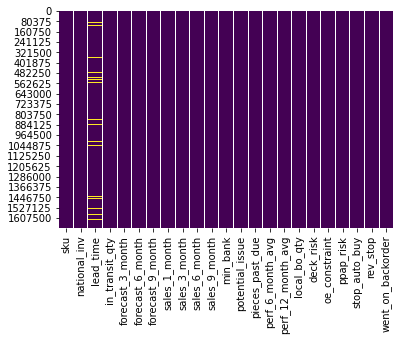

In [ ]:
sns.heatmap(train_df.isnull(), cmap='viridis',cbar=False)

In [ ]:
train_df.isna().sum()                       #check number of missing values

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

In [ ]:
#(train_df.isna().mean())*100        #check % of missing values

Now , lets see how many columns are numerical and categorical for better understanding and visualization

In [ ]:
#'sku' is id column. so it is not required

train_df.drop('sku',axis=1,inplace=True)                #drop id column


In [ ]:
Numerical_features=train_df.select_dtypes(exclude=['object'])
Numerical_features.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty'],
      dtype='object')

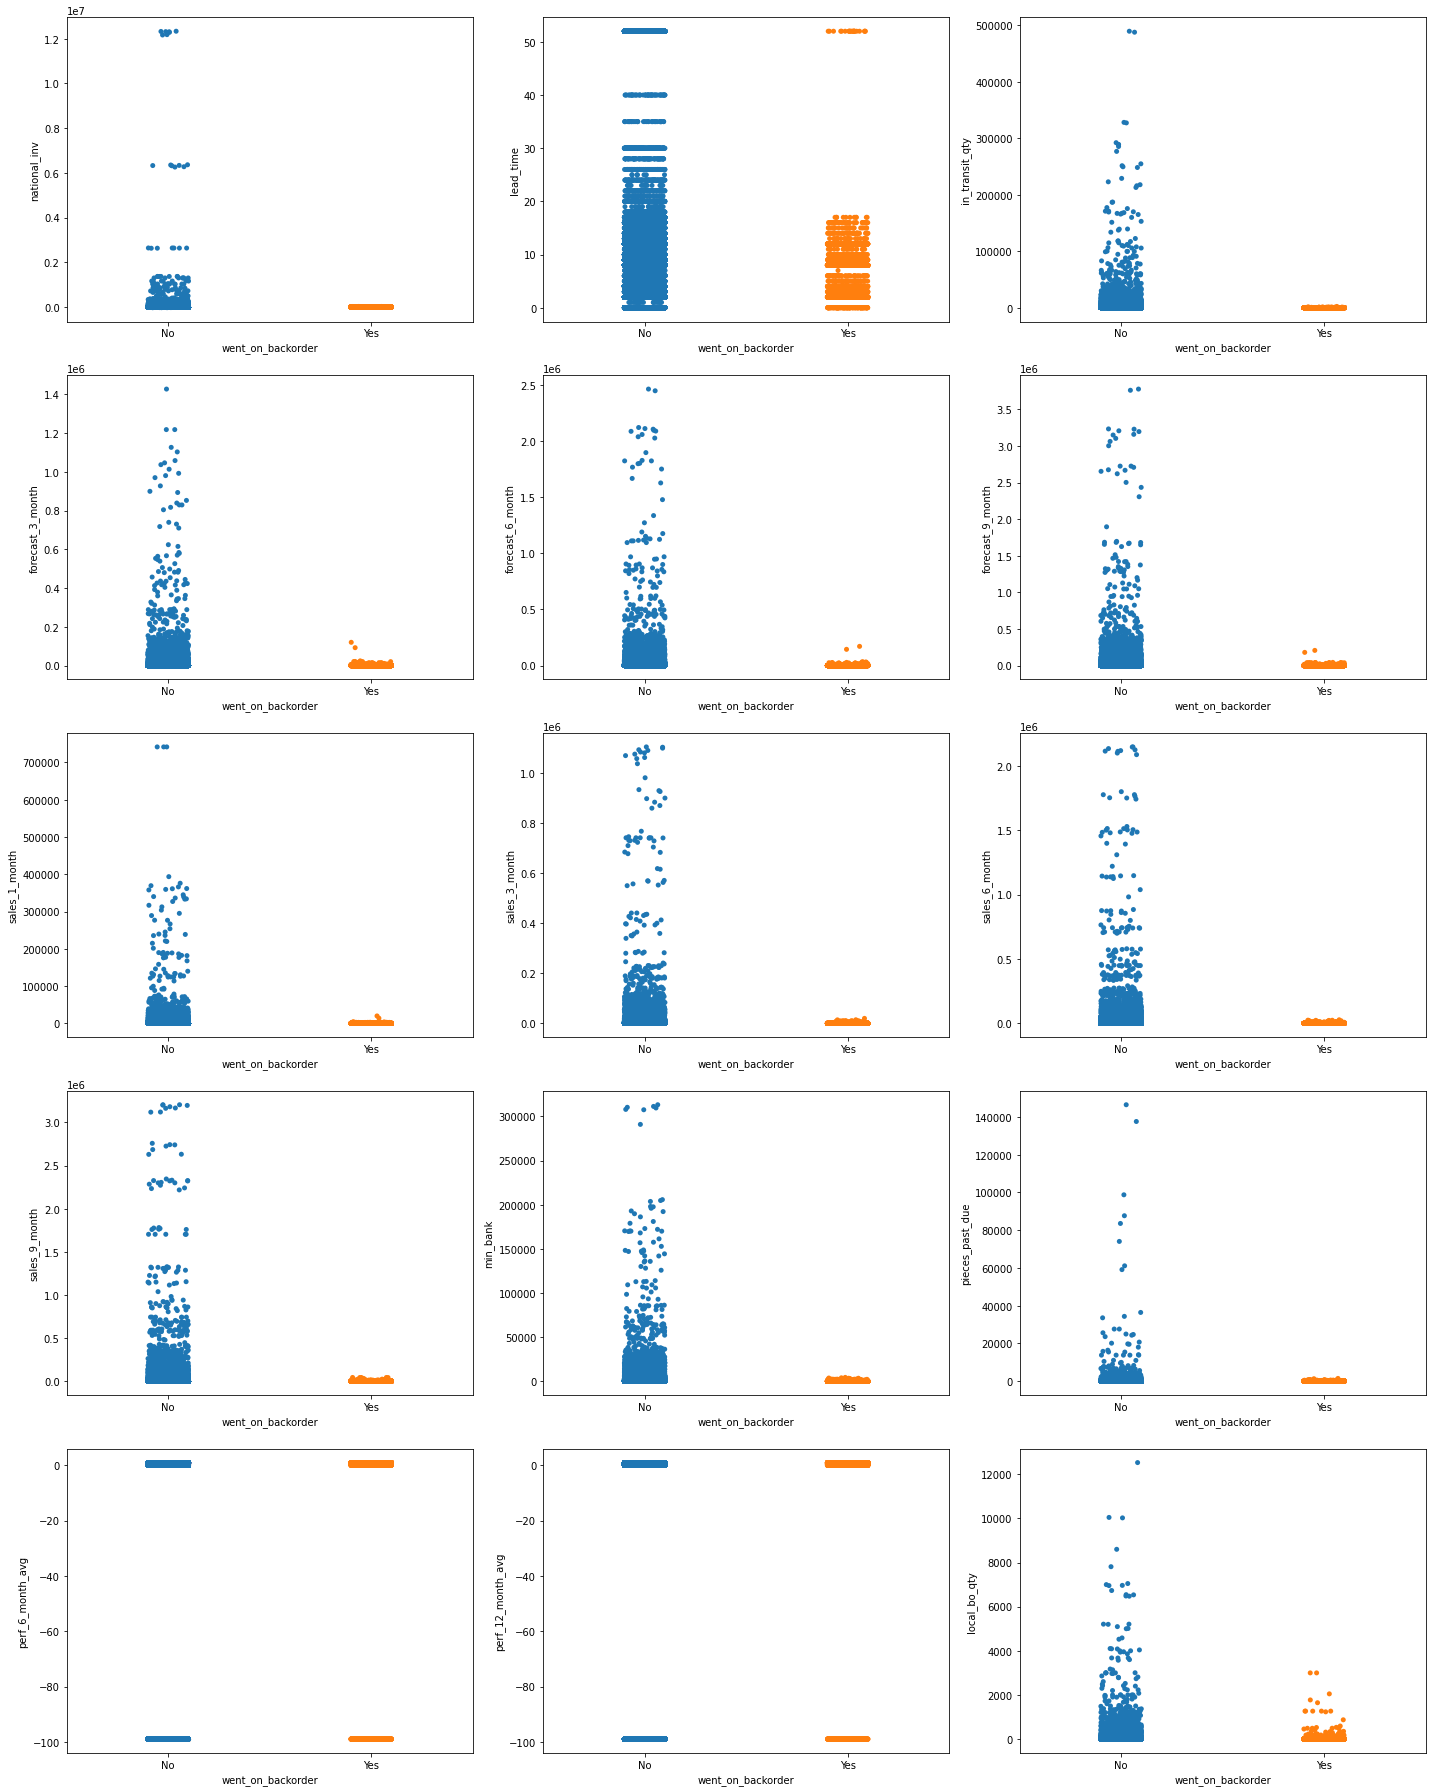

In [ ]:
# let's see relationship for target col and every numerical column
plot.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in Numerical_features:
    if plotnumber<=15 :
        ax = plot.subplot(5,3,plotnumber)
        sns.stripplot(train_df['went_on_backorder'],Numerical_features[column])
    plotnumber+=1
plot.tight_layout()

# Categorical Features

In [ ]:
Categorical_features=train_df.select_dtypes(include=['object'])
Categorical_features.columns

Index(['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
       'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

Distribution of categorical features

In [ ]:
#checking how many unique values are in columns
for col in Categorical_features.columns:
    print(len(train_df[col].unique()))

3
3
3
3
3
3
3


In [ ]:
str=Categorical_features.columns

In [ ]:
train_df[col].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
#encoding of categorical
for col in str:
    train_df[col] = train_df[col].map({"Yes" : 0, "No" : 1})

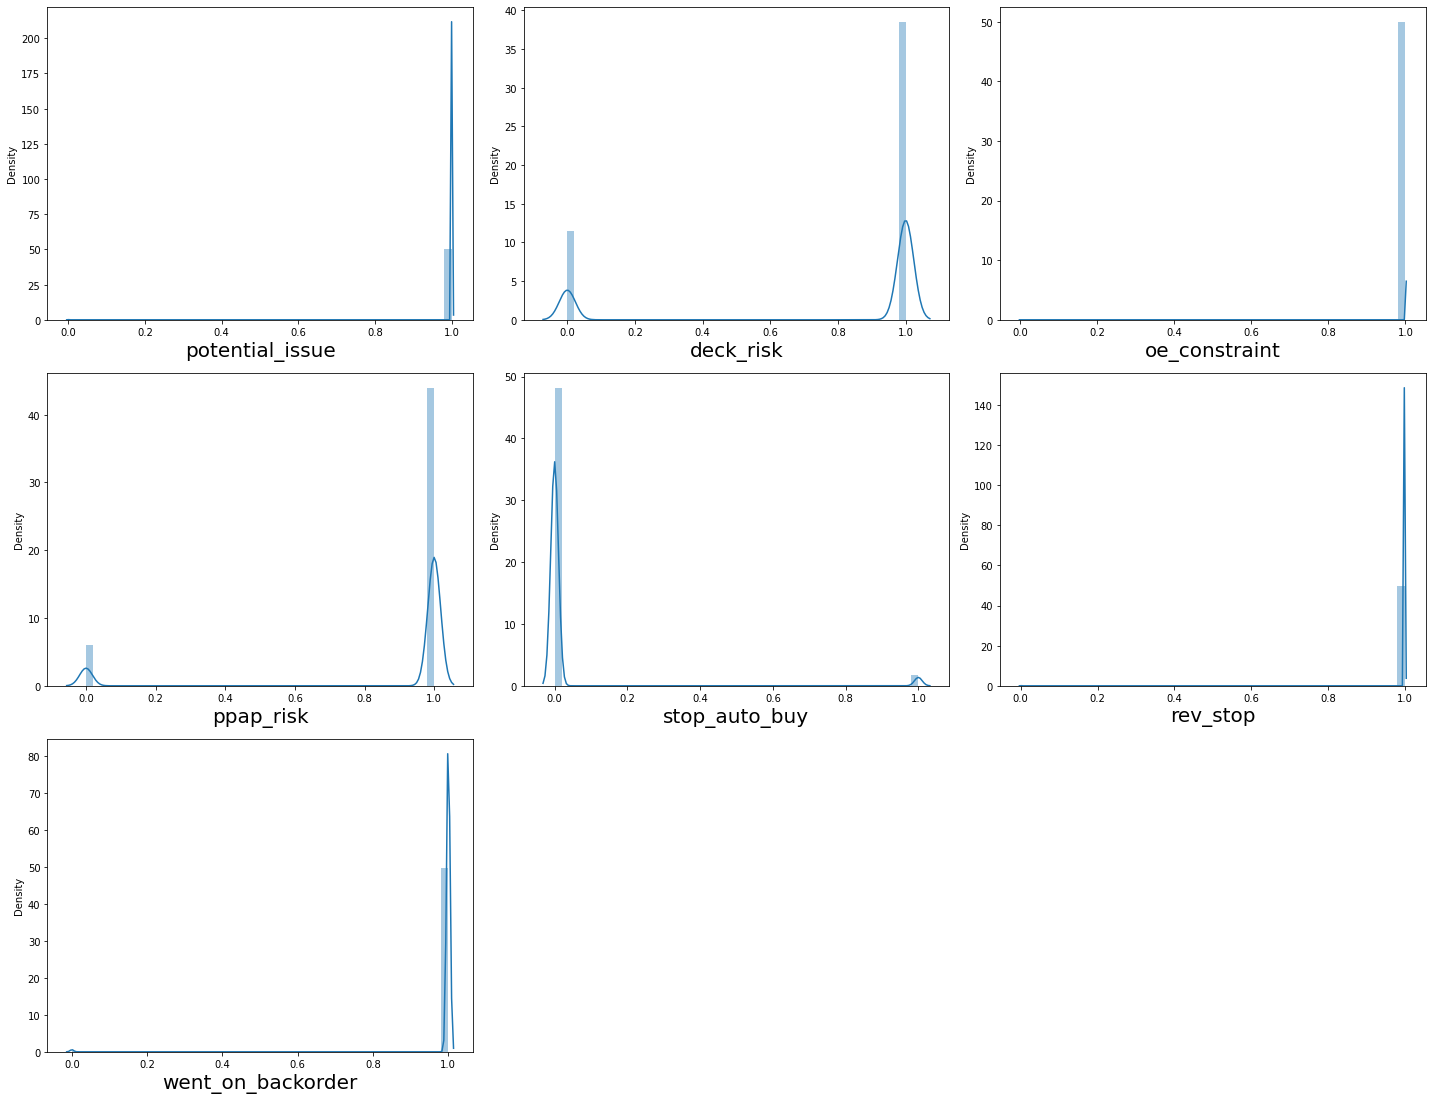

In [ ]:
# let's see distributiion of categorical columns
plot.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in Categorical_features:
    if plotnumber<=15 :
        ax = plot.subplot(5,3,plotnumber)
        sns.distplot(train_df[column])
        plot.xlabel(column,fontsize=20)
    plotnumber+=1
plot.tight_layout()

In [ ]:
#lets drop missing values
train_df.dropna(how='any',inplace=True)

In [ ]:
train_df.isnull().sum()

national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1586967 entries, 1 to 1687859
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   national_inv       1586967 non-null  float64
 1   lead_time          1586967 non-null  float64
 2   in_transit_qty     1586967 non-null  float64
 3   forecast_3_month   1586967 non-null  float64
 4   forecast_6_month   1586967 non-null  float64
 5   forecast_9_month   1586967 non-null  float64
 6   sales_1_month      1586967 non-null  float64
 7   sales_3_month      1586967 non-null  float64
 8   sales_6_month      1586967 non-null  float64
 9   sales_9_month      1586967 non-null  float64
 10  min_bank           1586967 non-null  float64
 11  potential_issue    1586967 non-null  float64
 12  pieces_past_due    1586967 non-null  float64
 13  perf_6_month_avg   1586967 non-null  float64
 14  perf_12_month_avg  1586967 non-null  float64
 15  local_bo_qty       1586967 non-n

In [ ]:
X = train_df.drop(["went_on_backorder"],axis=1)

In [ ]:
X.shape

(1586967, 21)

In [ ]:
y=train_df['went_on_backorder']
y.shape

(1586967,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [ ]:
print("Train Set Size : ",x_train.shape)
print("Train Target Set Size : ",y_train.shape)
print("Test  Set Size : ",x_test.shape)
print("Test  Target Set Size : ",y_test.shape)

Train Set Size :  (1110876, 21)
Train Target Set Size :  (1110876,)
Test  Set Size :  (476091, 21)
Test  Target Set Size :  (476091,)


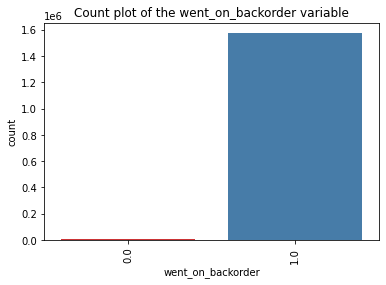

In [ ]:
#here  i m ploting the bar graph for went_on_backorder to identify the counting of backorder or not 

sns.countplot(y, palette='Set1')
plot.title("Count plot of the went_on_backorder variable")
plot.xticks(rotation = 90)
plot.show()

We can see that our dataset is imbalanced so we need to balance our dataset first

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train, y_train = sm.fit_sample(x_train, y_train)

In [ ]:
x_train.shape, y_train.shape

((2206344, 21), (2206344,))

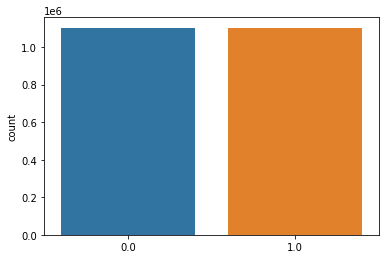

In [ ]:
sns.countplot(y_train)

# **Analysis of different modelling algorithms**

# **Model Building**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV


**Logistic Regression**

In [ ]:
#logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(x_test)
accuracy = round(accuracy_score(y_test,y_pred)*100,2)
accuracy

91.95

In [ ]:
acc_log_lr = round(logreg.score(x_train, y_train) * 100, 2)
acc_log_lr

74.56

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.05      0.54      0.08      3265
         1.0       1.00      0.92      0.96    472826

    accuracy                           0.92    476091
   macro avg       0.52      0.73      0.52    476091
weighted avg       0.99      0.92      0.95    476091



In [ ]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[  1775,   1490],
       [ 36838, 435988]])

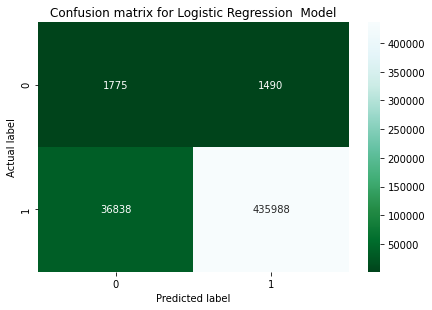

In [ ]:
#create a heat map
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)), annot = True, cmap = 'BuGn_r',
           fmt = 'g')
plot.tight_layout()
plot.title('Confusion matrix for Logistic Regression  Model', y = 1.1)
plot.ylabel('Actual label')
plot.xlabel('Predicted label')
plot.show()

**Decision Tree**

In [ ]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(x_train, y_train)  

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
Y_pred = decision_tree.predict(x_test)  
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

99.89

In [ ]:
acc_log_dt = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_log_dt

99.89

In [ ]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

         0.0       0.27      0.42      0.33      3265
         1.0       1.00      0.99      0.99    472826

    accuracy                           0.99    476091
   macro avg       0.63      0.71      0.66    476091
weighted avg       0.99      0.99      0.99    476091



In [ ]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,Y_pred)
conf_mat

array([[  1384,   1881],
       [  3829, 468997]])

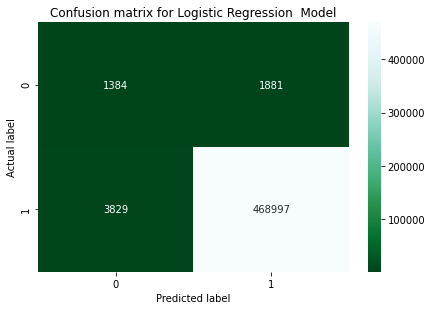

In [ ]:
#create a heat map
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,Y_pred)), annot = True, cmap = 'BuGn_r',
           fmt = 'g')
plot.tight_layout()
plot.title('Confusion matrix for Logistic Regression  Model', y = 1.1)
plot.ylabel('Actual label')
plot.xlabel('Predicted label')
plot.show()

**Random Forest**

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
Y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)

In [ ]:
random_forest.score(x_test,y_test)

0.9935264476749193

In [ ]:
print(classification_report(y_test,Y_prediction))
# Confusion Matrix
conf_mat = confusion_matrix(y_test,Y_prediction)
print(conf_mat)

              precision    recall  f1-score   support

         0.0       0.53      0.45      0.49      3265
         1.0       1.00      1.00      1.00    472826

    accuracy                           0.99    476091
   macro avg       0.76      0.72      0.74    476091
weighted avg       0.99      0.99      0.99    476091

[[  1469   1796]
 [  1286 471540]]


**Gaussian**

In [ ]:
gaussian = GaussianNB() 
gaussian.fit(x_train, y_train)  
Y_pred_Gaus = gaussian.predict(x_test)  
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)

In [ ]:
acc_gaussian

52.51

In [ ]:
print(classification_report(y_test,Y_pred_Gaus))
# Confusion Matrix
conf_matrix = confusion_matrix(y_test,Y_pred_Gaus)
print(conf_matrix)

              precision    recall  f1-score   support

         0.0       0.01      0.98      0.01      3265
         1.0       1.00      0.07      0.13    472826

    accuracy                           0.08    476091
   macro avg       0.50      0.52      0.07    476091
weighted avg       0.99      0.08      0.13    476091

[[  3189     76]
 [439414  33412]]


In [ ]:
results = pd.DataFrame({
    'Model': [ 'Logistic Regression', 
              'Random Forest','Decision Tree', 'Naive Bayes'
              ],
    'Score': [ acc_log_lr, 
              acc_random_forest, acc_log_dt,acc_gaussian]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

Since we are getting good score in random forest, decision tree and random forest. Therefore, we will do further analysis and preprocessing with these three models.